# Importando as bibliotecas

In [77]:
import pandas as pd
import plotly.express as px
import missingno as msno

# Importando as bases de dados

## Base de dados

Base de dados loja de jogos on-line.

In [78]:
dados = pd.DataFrame(pd.read_csv("../1_bases_originais/original.csv"))

In [79]:
dados

,nome,porcentagem_desconto,preço,tipo,plataforma,sistema
0,Tom Clancy’s Rainbow Six - SIEGE - Standard Ed...,0,"R$ 59,99",Padrão,pc,windows
1,DRAGON BALL FighterZ - FighterZ Pass,0,"R$ 89,90",DLC,pc,"steam,windows"
2,Men of War: Assault Squad 2 - War Chest Edition,-77%,"R$ 32,04",Padrão,pc,"steam,windows"
3,NARUTO SHIPPUDEN: Ultimate Ninja STORM 4 - Roa...,0,"R$ 122,16",Padrão,pc,"steam,windows"
4,Naruto Shippuden: Ultimate Ninja Storm 4,0,"R$ 97,00",Padrão,pc,"steam,windows"
...,...,...,...,...,...,...
595,NARUTO TO BORUTO: SHINOBI STRIKER,0,"R$ 139,90",Padrão,pc,"steam,windows"
596,For Honor: Starter Edition,0,"R$ 44,99",Padrão,pc,windows
597,METAL GEAR SURVIVE,0,"R$ 79,99",Padrão,pc,"steam,windows"
598,GOD EATER 2 Rage Burst,0,"R$ 129,99",Padrão,pc,"steam,windows"


In [80]:
# verificando o tamanho da base em linhas e colunas
dados.shape

(600, 6)

# Primeiros tratamentos

## Resetando o index e eliminando os duplicados

In [81]:
dados.index.value_counts()

0      1
394    1
396    1
397    1
398    1
      ..
200    1
201    1
202    1
203    1
599    1
Length: 600, dtype: int64

In [82]:
dados.reset_index(drop=True).index.value_counts()

0      1
394    1
396    1
397    1
398    1
      ..
200    1
201    1
202    1
203    1
599    1
Length: 600, dtype: int64

In [83]:
dados.duplicated().sum()

0

In [84]:
dados.loc[dados.nome.duplicated()==True]

,nome,porcentagem_desconto,preço,tipo,plataforma,sistema


In [85]:
# criando um novo objeto dados, resetando o index do objeto anterior e eliminando duplicados
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(600, 6)

## Retirando variáveis

No pandas, utilizamos o comando .drop para eliminar as colunas que não pretendemos trabalhar.

In [86]:
#Não será necessário remoção de colunas

## Editando os nomes das colunas

### Nomes das colunas em minusculo

In [87]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preço', 'tipo', 'plataforma',
       'sistema'],
      dtype='object')

In [88]:
dados.columns = dados.columns.str.lower()

### Substituindo caracteres especiais das colunas

In [89]:
dados.columns = dados.columns.str.replace('ç', 'c')

In [90]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preco', 'tipo', 'plataforma',
       'sistema'],
      dtype='object')

### Substituindo caracteres especiais das linhas de colunas específicas

In [91]:
dados.preco=dados.preco.str.replace('\W','')
dados.preco=dados.preco.str.replace('R','')

C:\Users\ionaf\AppData\Local\Temp\ipykernel_5260\1570654488.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



### Substituindo caracteres especiais de toda a base de dados

In [92]:
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ':' : '',
                '-' : '',
                "’" : "",
                "'" : "",
                "/" : "",
                "%" : "",
                '™' : "",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"               
              }, regex=True)

## Convertendo preços para númerico

In [93]:
dados.preco = pd.to_numeric(dados.preco, errors='coerce')

## Dados Missing

<Axes: >

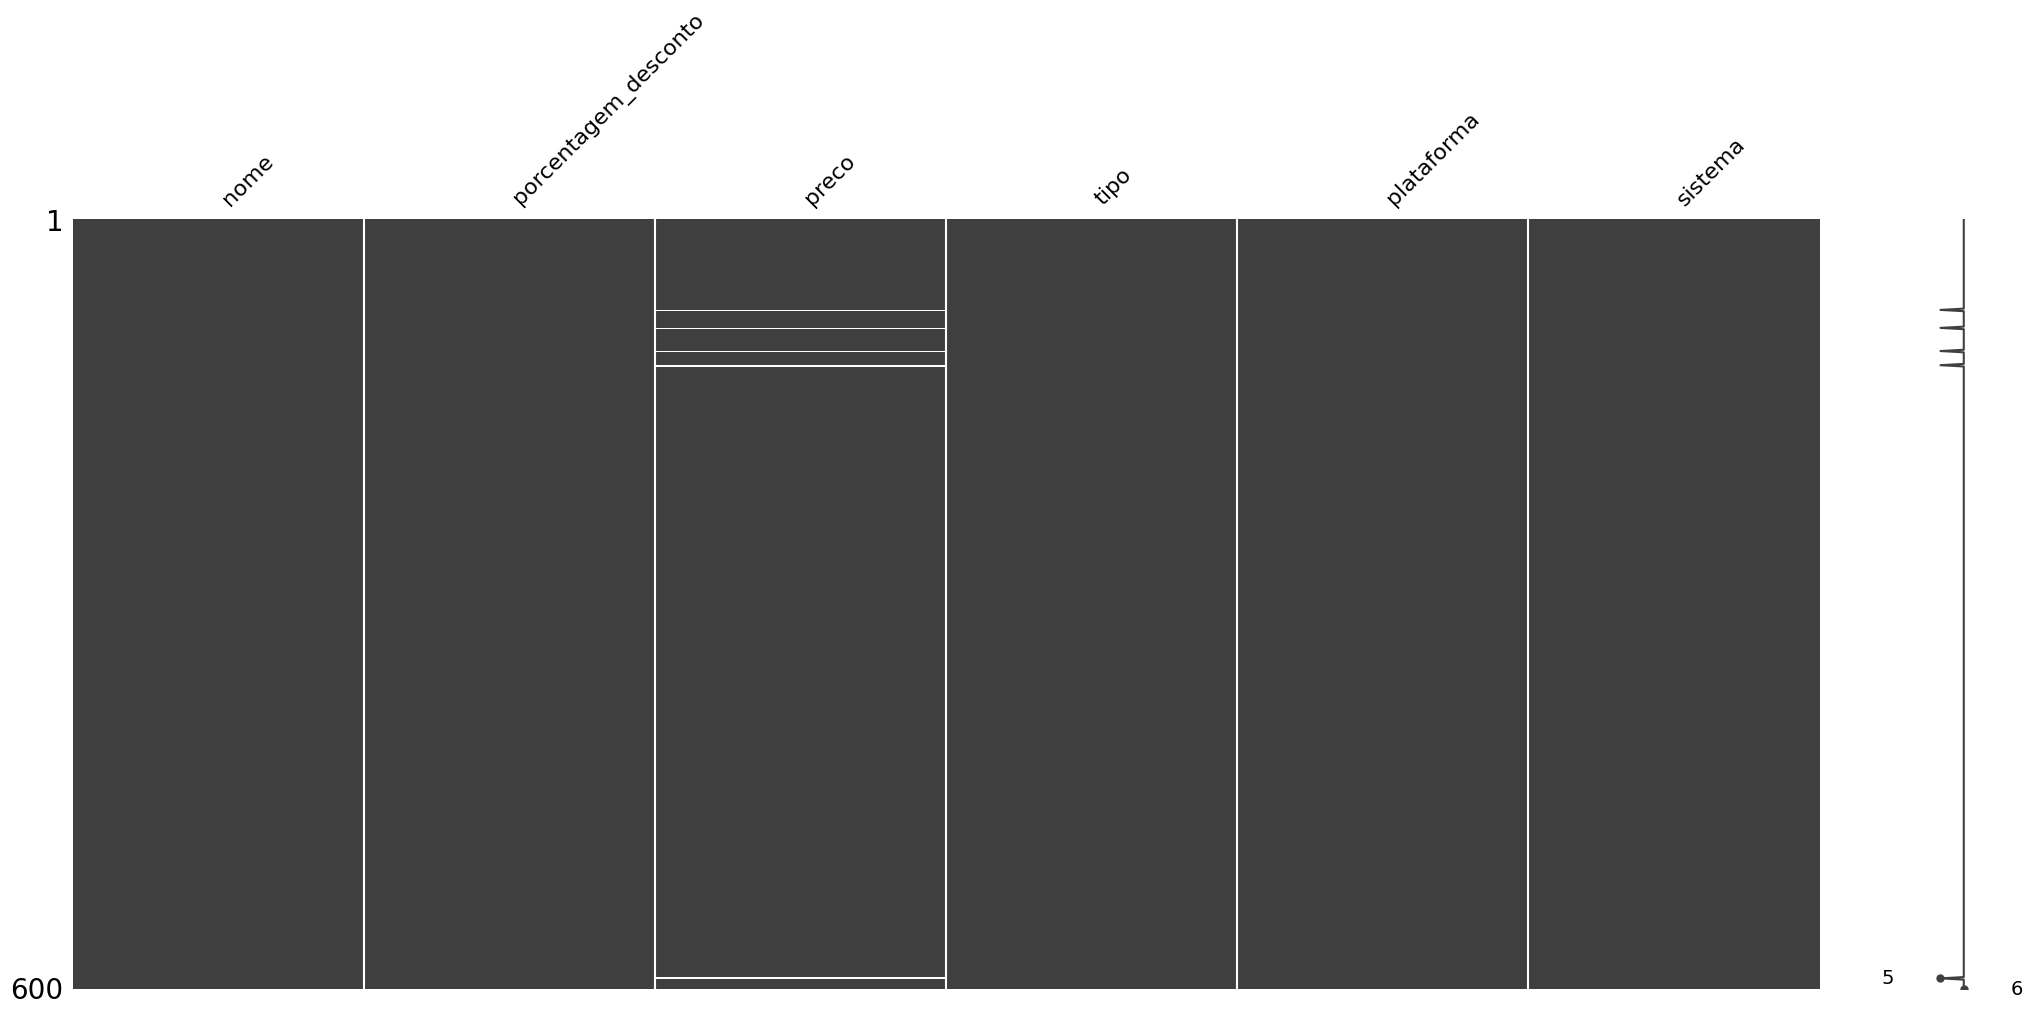

In [94]:
msno.matrix(dados)

<Axes: >

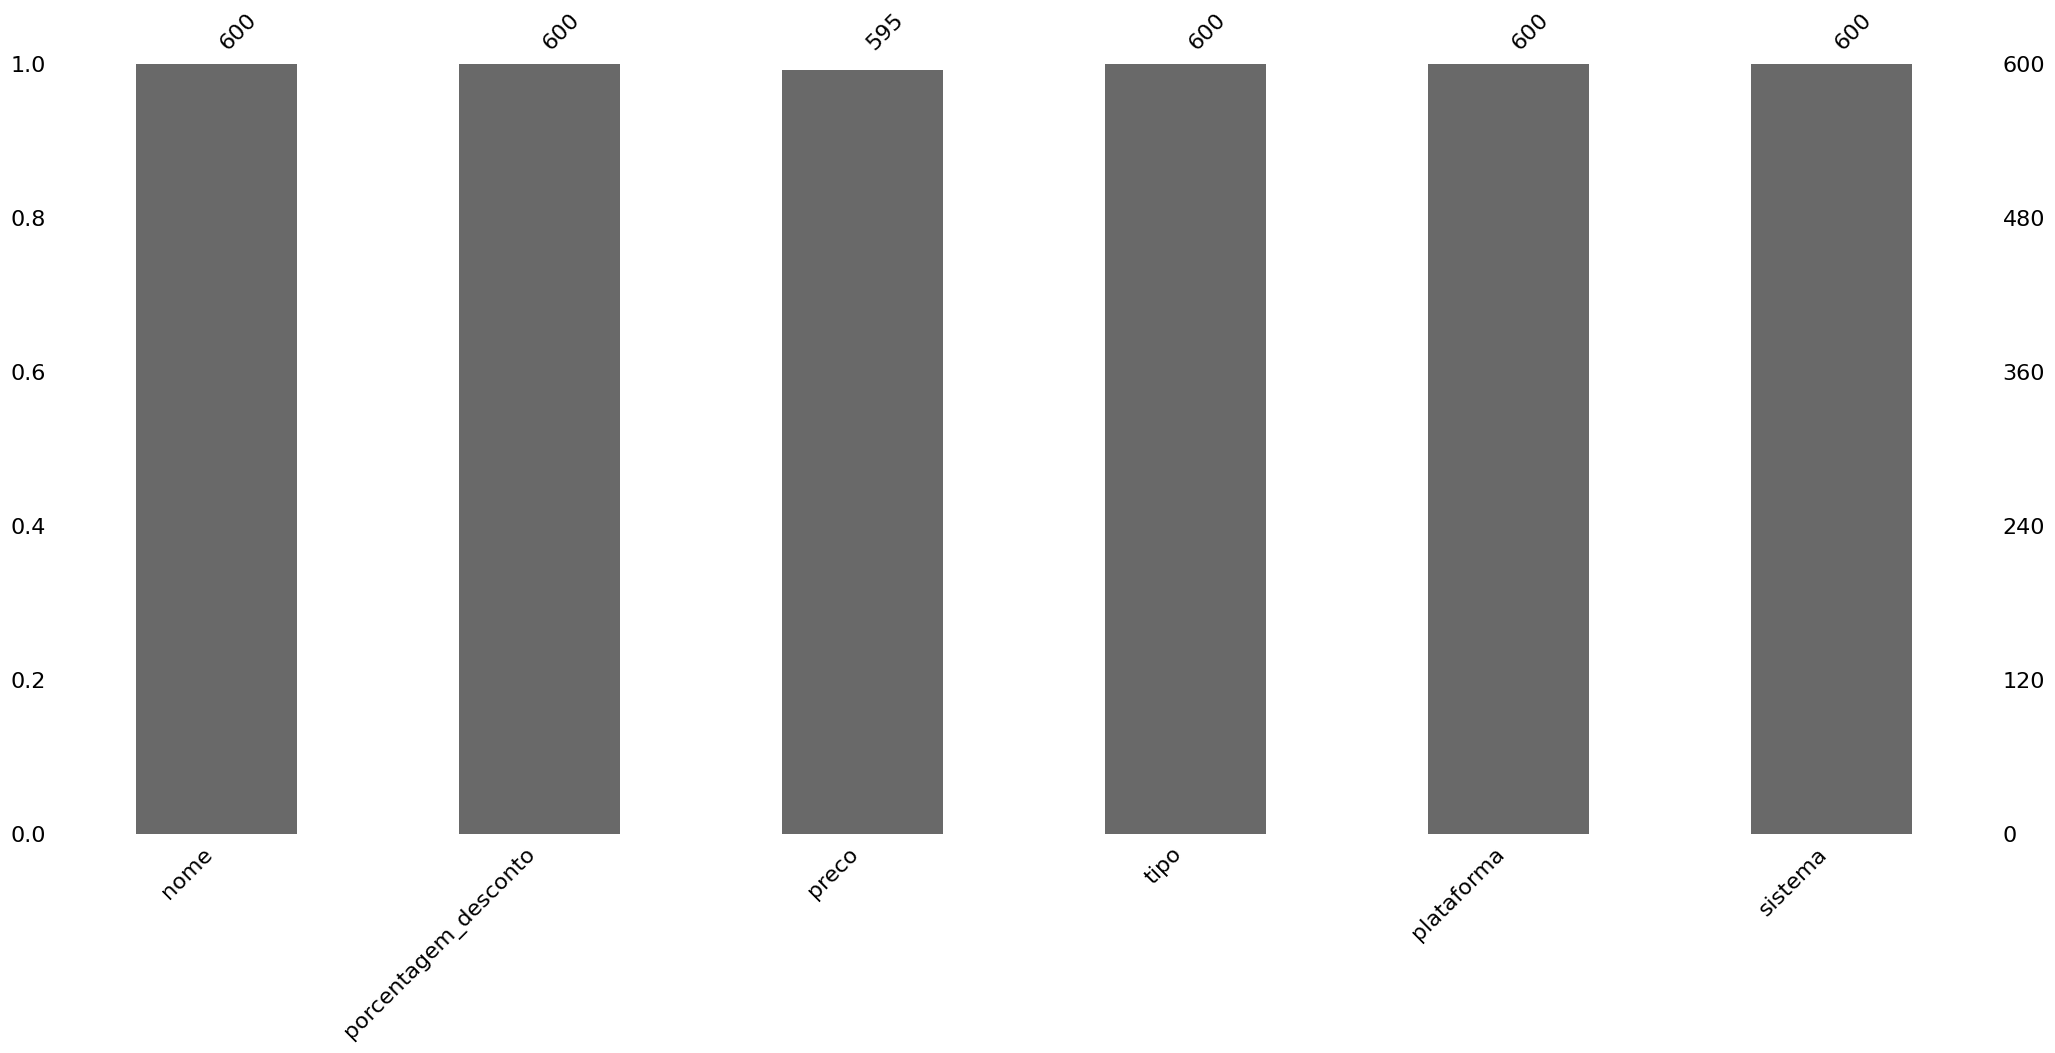

In [95]:
msno.bar(dados)

### Justificativa da remoção de dados nulos
Em análise dos dados, entendemos que os itens que retornaram indisponíveis da raspagem de dados, não fariam sentido serem expostos ou estarem contidos na base tratada.

In [96]:
dados = dados.dropna()
dados.isna().sum()

nome                    0
porcentagem_desconto    0
preco                   0
tipo                    0
plataforma              0
sistema                 0
dtype: int64

### Resetando index

In [97]:
dados = dados.reset_index(drop=True)
dados

,nome,porcentagem_desconto,preco,tipo,plataforma,sistema
0,Tom Clancys Rainbow Six SIEGE Standard Edition,0,5999.0,Padrao,pc,windows
1,DRAGON BALL FighterZ FighterZ Pass,0,8990.0,DLC,pc,"steam,windows"
2,Men of War Assault Squad 2 War Chest Edition,77,3204.0,Padrao,pc,"steam,windows"
3,NARUTO SHIPPUDEN Ultimate Ninja STORM 4 Road ...,0,12216.0,Padrao,pc,"steam,windows"
4,Naruto Shippuden Ultimate Ninja Storm 4,0,9700.0,Padrao,pc,"steam,windows"
...,...,...,...,...,...,...
590,NARUTO TO BORUTO SHINOBI STRIKER,0,13990.0,Padrao,pc,"steam,windows"
591,For Honor Starter Edition,0,4499.0,Padrao,pc,windows
592,METAL GEAR SURVIVE,0,7999.0,Padrao,pc,"steam,windows"
593,GOD EATER 2 Rage Burst,0,12999.0,Padrao,pc,"steam,windows"


### Transformando o preço para valor monetário

In [98]:
dados['preco'] = dados['preco'].div(100)
dados.preco

0       59.99
1       89.90
2       32.04
3      122.16
4       97.00
        ...  
590    139.90
591     44.99
592     79.99
593    129.99
594     17.99
Name: preco, Length: 595, dtype: float64

## Tranformando texto para lower case e criando padrão de uso

In [99]:
dados.nome = dados.nome.str.lower()
dados.tipo = dados.tipo.str.lower()
dados

,nome,porcentagem_desconto,preco,tipo,plataforma,sistema
0,tom clancys rainbow six siege standard edition,0,59.99,padrao,pc,windows
1,dragon ball fighterz fighterz pass,0,89.90,dlc,pc,"steam,windows"
2,men of war assault squad 2 war chest edition,77,32.04,padrao,pc,"steam,windows"
3,naruto shippuden ultimate ninja storm 4 road ...,0,122.16,padrao,pc,"steam,windows"
4,naruto shippuden ultimate ninja storm 4,0,97.00,padrao,pc,"steam,windows"
...,...,...,...,...,...,...
590,naruto to boruto shinobi striker,0,139.90,padrao,pc,"steam,windows"
591,for honor starter edition,0,44.99,padrao,pc,windows
592,metal gear survive,0,79.99,padrao,pc,"steam,windows"
593,god eater 2 rage burst,0,129.99,padrao,pc,"steam,windows"


## Tratamento de Outlier

Ao realizar análise dos outlier da base, verificamos que apesar de fora do desvio padrão, estes dados não deveriam ser descartados, uma vez que representam o valor real do item.

In [100]:
px.box(dados.preco)

## Salvar base de dados tratadas

In [101]:
dados.to_csv("../2_bases_tratadas/base_tratada.csv", index=True)